# Predicting Mortgage Interest Rate

## 1. Introduction

The mortgage market plays a pivotal role in economic stability, housing affordability, and lending practices. Accurate determination of mortgage interest rates is crucial for lenders, investors, and policymakers to assess borrower risk, optimize lending strategies, and ensure sustainable financing. Interest rates are influenced by a combination of borrower characteristics, loan attributes, and loan purposes. Understanding the relationship between these factors is essential for making data-driven decisions that improve mortgage pricing strategies and enhance homebuyer affordability.

This project aims to develop a predictive model to estimate mortgage interest rates using a comprehensive dataset that includes borrower profiles, loan details, and property-related attributes. I utilized the Freddie Mac Single-Family Loan-Level Dataset for the year 2022 (sample), which provides detailed loan origination data. By exploring trends and relationships within this dataset, the analysis seeks to uncover the most meaningful predictors of interest rates and provide actionable insights for key stakeholders.

To achieve this, I implemented four regression models: Multiple Linear Regression, K-Nearest Neighbors (KNN), Decision Tree Regression, and Random Forest Regression. Model performance was evaluated using Mean Squared Error (MSE) on both training and testing datasets. Additionally, feature importance analysis was conducted to identify and interpret the contributions of individual predictors to interest rate variations.

The results demonstrate that all models significantly outperformed the baseline prediction, which used the mean interest rate as a constant. Among the models, Random Forest Regression achieved the best performance with the lowest testing MSE, showcasing its ability to capture complex, non-linear relationships within the data. Multiple Linear Regression, while simpler, performed competitively and provided interpretable insights into the relationships between features and interest rates. Across all models, loan purpose emerged as the most significant predictor, followed by borrower credit score and occupancy status.

This project highlights the values of different models in predicting mortgage interest rates, offering stakeholders a powerful tool to improve pricing strategies, assess risk, and promote financial sustainability in the housing market.

## 2. Data Description


#### Dataset Description:

The dataset used in this project is sourced from Freddie Mac's Single-Family Loan-Level Dataset and specifically focuses on the 2022 sample origination file. The dataset contains loan-level details for a random sample of 50,000 mortgages acquired by Freddie Mac. Each record in the dataset represents a single mortgage loan and includes variables that capture borrower creditworthiness, loan characteristics, and property details.

The dataset is provided in a pipe-separated (.txt) format and contains 32 columns. Given the project's focus on predicting the loan interest rates, only a subset of keys variables was selected for further analysis:
- Credit_Score: A measure of borrower creditworthiness. Higher scores generally indicate lower lending risk.
- LTV (Loan-to-Value Ratio): The ratio of the loan amount to the appraised property value, capturing borrower equity.
- DTI (Debt-to-Income Ratio): The proportion of borrower debt relative to income, reflecting financial stability.
- UPB (Unpaid Principal Balance): The size of the loan, expressed in thousands of dollars.
- Purpose: Indicates the reason for the loan (e.g., purchase, refinance, or cash-out refinance). This directly influences interest rates due to risk and loan structuring differences.
- Occupancy_Status: Describes the intended use of the property, including primary residence, second home, or investment property. Investment properties typically carry higher risk and thus higher rates.

The Interest_Rate, our target variable, represents the original interest rate charged on the loan. By combining these carefully selected variables, the dataset provides a robust foundation for analyzing the factors influencing mortgage pricing.




#### Data Pre-Processing & Preliminary Examination:

The initial step in preparing the dataset involved addressing missing or placeholder values to ensure data integrity. Specifically, placeholder values were identified and filtered out across both numeric and categorical variables. For numeric variables, rows where Credit_Score equaled 9999, LTV (Loan-to-Value Ratio) equaled 999, or DTI (Debt-to-Income Ratio) equaled 999 were removed. Similarly, categorical variables were cleaned by removing rows where Purpose or Occupancy_Status equaled “9,” denoting unavailable information. This step ensured that all retained data points were valid and complete for subsequent analysis. Additionally, the UPB variable, which represents the loan amount, was scaled down by dividing its values by 1000 to improve readability and interpretability during analysis.

After cleaning and scaling, the final dataset consisted of key numeric and categorical variables that are most relevant to the project’s objective of predicting mortgage interest rates with 49979 entries. The selected variables include Credit_Score, LTV, DTI, and UPB for numeric predictors, and Purpose and Occupancy_Status for categorical predictors. These variables were chosen for their potential to influence interest rates based on financial theory and lending practices.



####Exploratory Data Analysis (EDA):

The histogram of Interest Rates reveals a roughly normal distribution centered around 5% to 6%, indicating that the majority of loans have interest rates within this range. The distribution is unimodal with a single peak, and the values gradually decrease toward both tails. The interest rates span from a minimum of approximately 2% to a maximum of around 8%, suggesting a diverse range of mortgage pricing in the dataset.

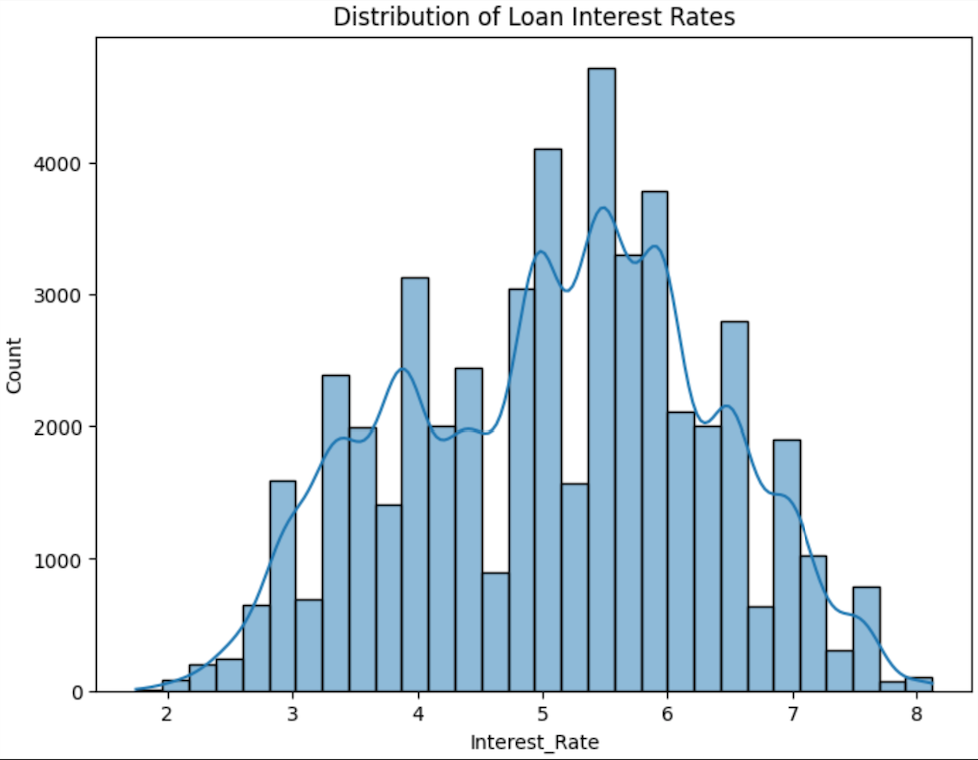

According to the following scatterplots for numerical variables:  

- There is no clear trend between Credit Score and Interest Rate, as interest rates appear evenly distributed across all credit scores from around 600 to more than 800. While higher credit scores are generally expected to result in lower interest rates, this pattern is not strongly evident in the data.

- Interest rates appear more concentrated near 80% LTV (Loan-to-Value), where loans are most frequent, but no distinct upward trend is observed. Higher LTV typically increases lender risk and should theoretically raise interest rates.

- No strong relationship is evident between DTI (Debt-to-Income Ratio) and interest rate, though interest rates show slight dispersion at higher DTI values, especially few data with greater than 50% DTI ratio. Higher DTI usually signals increased borrower risk, which is expected to elevate interest rates.

- Interest rates are scattered across all UPB ranges, with  loans larger than $1000,000 appearing less frequent. While larger UPBs can increase risk, they may also indicate established borrowers who qualify for better terms.

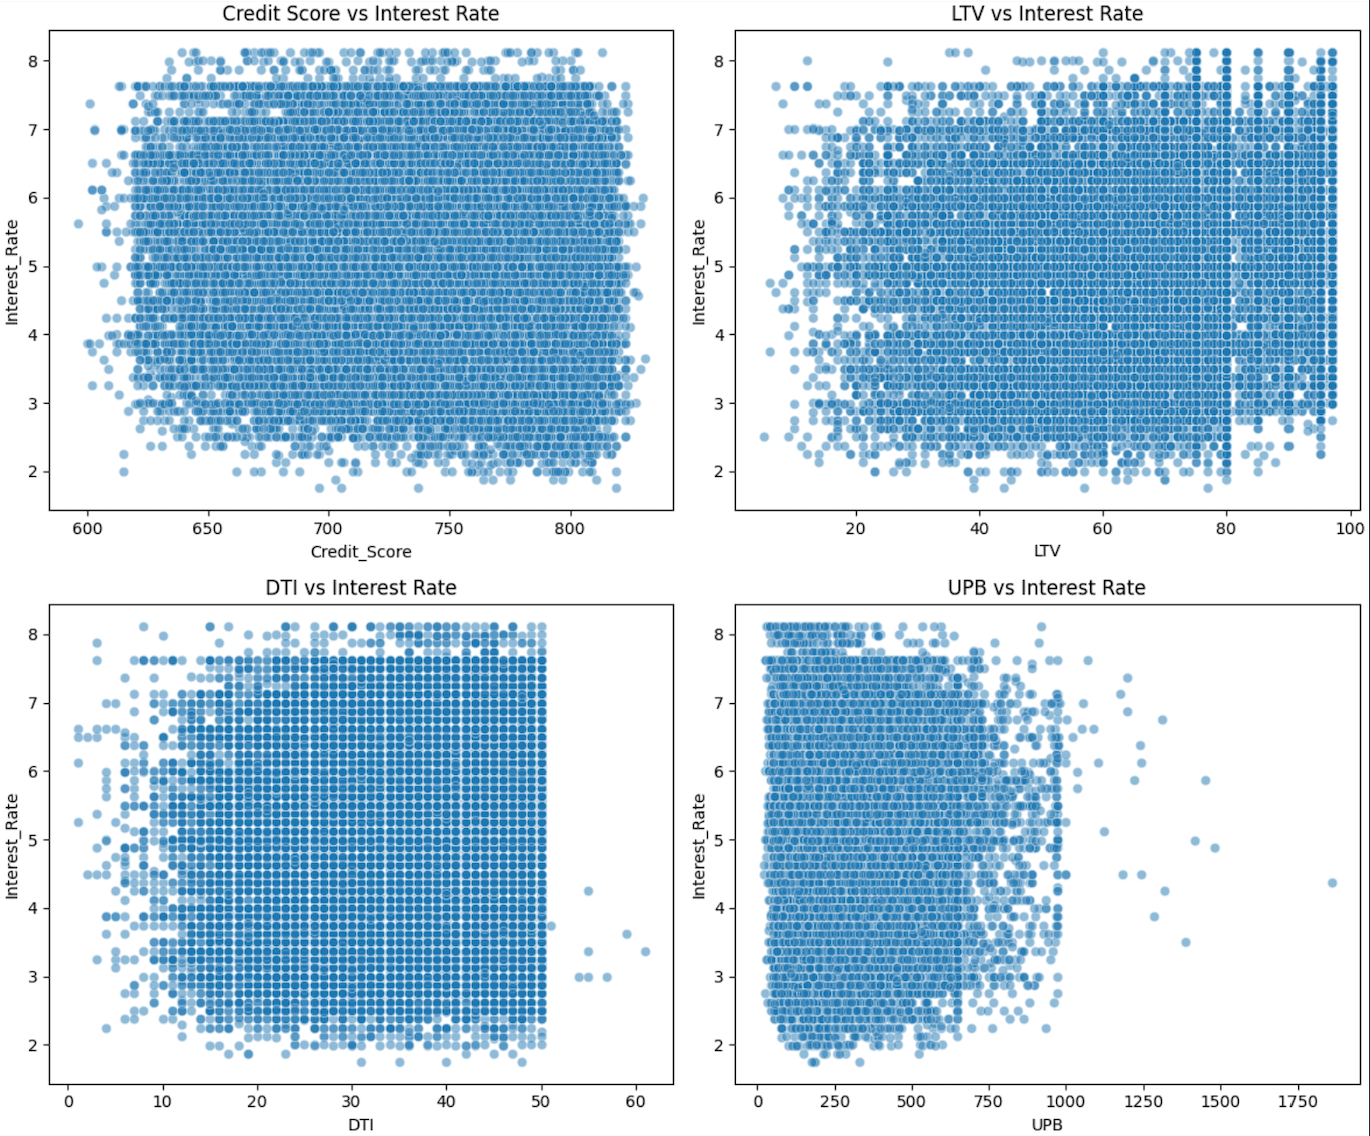

To further quantify the strength of these relationships, a correlation matrix was constructed. The matrix confirmed that all numerical variables exhibit weak correlations with interest rates.

- LTV had the highest correlation with interest rate at 0.19. A higher LTV indicates that the borrower has less equity in the property, which increases the risk to the lenders if default. Thus, I would also expect higher LTV to increase the interest rate.

- DTI has a weak positive correlation of 0.11. A higher DTI indicates that a larger portion of the borrower's income is being used to underwrite the loan, which increases the risk of default. Thus, I would also expect higher DTI to increase the interest rate.

- UPB displayed very weak correlations of -0.018. UPB represents the remaining unpaid loan balance. Larger loans generally represent higher risk to lenders if default. But, loans with higher UPB can also indicate well-established borrowers who may qualify for better loan terms. Thus, I think it is reasonable that higher UPB could both increase or decrease the interest rate depending on specific cases.

- Credit Score also displayed weak correlations of -0.059. It makes sense as higher credit score increases the borrower's credibility, thus lower interest rate would be granted.

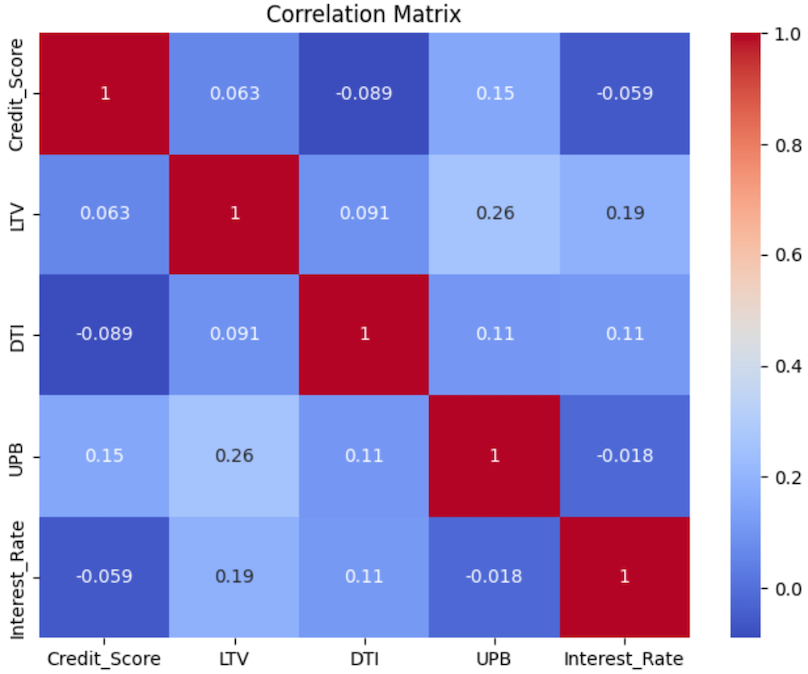

The impact of categorical variables—Loan Purpose and Occupancy Status—on interest rates was explored using box plots.
- Differences in interest rates were observed across loan purposes. "Purchase" loans (P) and "Cash-out Refinance" loans (C) had slightly higher median interest rates compared to "No Cash-out Refinance" loans (N), indicating that loan purpose could play a role in mortgage pricing.
- Interest rates also varied slightly by occupancy status. Investment properties (I) showed higher median interest rates compared to Primary Residences (P) and Second Homes (S). This suggests that loans associated with investment properties may carry a higher risk premium.

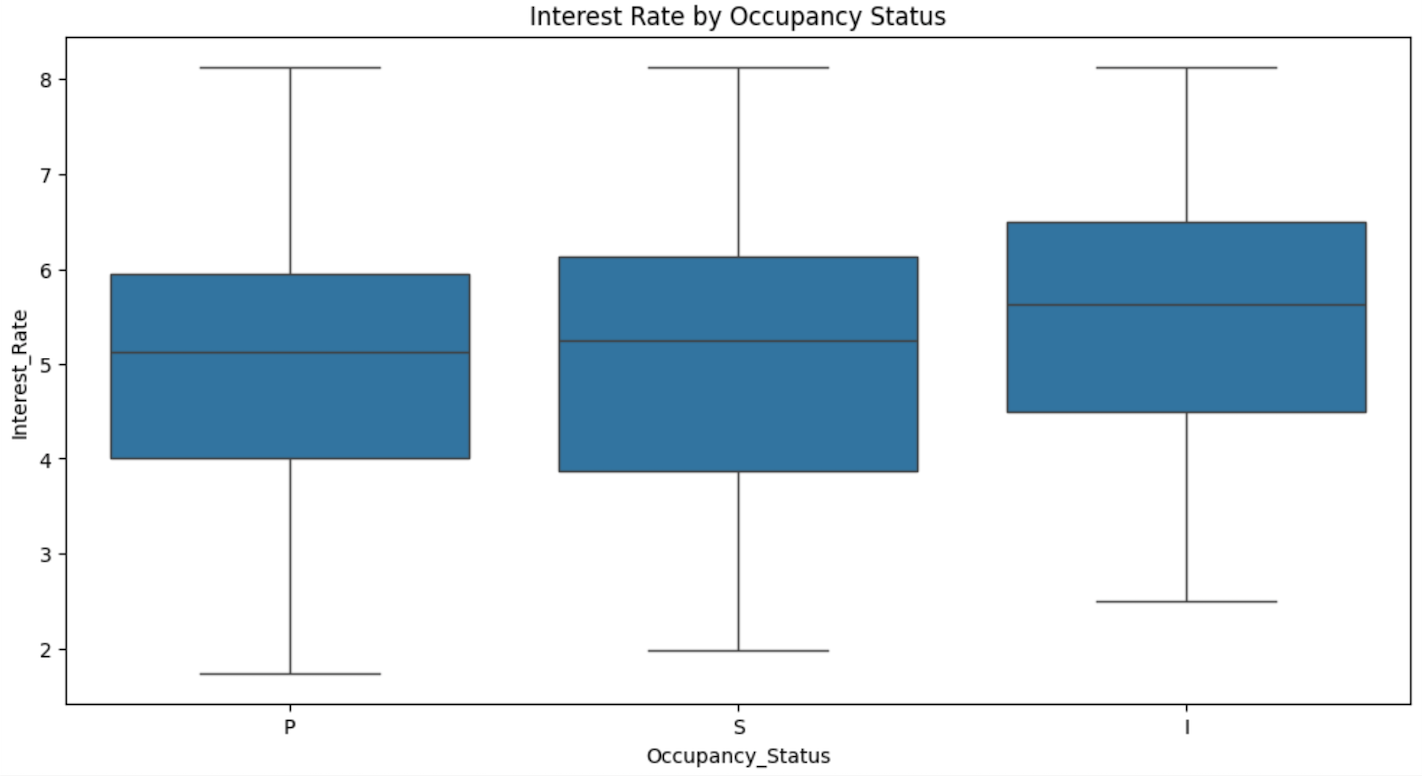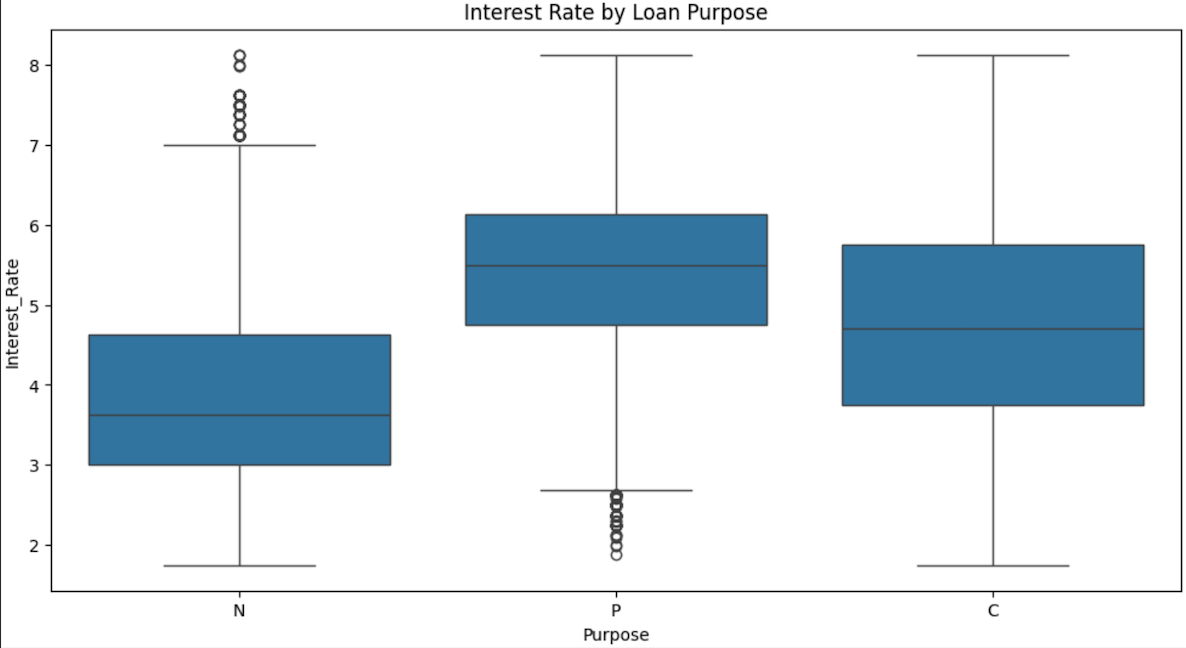

## 3. Models and Methods

To predict mortgage interest rates, I implemented a variety of regression models and compared their performance to identify the most accurate one. The models include Multiple Linear Regression, K-Nearest Neighbors (KNN), Decision Tree Regression, and Random Forest Regression. Model performance was evaluated using Mean Squared Error (MSE) as the primary performance metric. Additionally, I conducted feature importance analysis to identify which variables contribute most significantly to predicting mortgage interest rates.

To ensure robust evaluation and avoid overfitting, I split the dataset into an 80-20 train-test split: 80% of the data was used to train the models, while 20% was reserved for testing. This setup allows for reliable generalization of model performance on unseen data.

#### Data Preprocessing Pipeline
Given that the dataset contains both numerical and categorical variables, I designed a preprocessing pipeline using `scikit-learn` utilities:
- `StandardScaler`: Standardizes numerical features to ensure all variables are on the same scale.
- `OneHotEncoder`: Converts categorical variables into binary indicator variables.
- `ColumnTransformer`: Integrates these preprocessing steps into a unified pipeline, ensuring seamless handling of both types of features during model fitting and testing.

#### Baseline Model
To establish a benchmark for comparison, I first created a baseline model by predicting the mean of the target variable, Interest Rate, for all data points. This naïve approach serves as a reference point, against which the performance of more complex models can be evaluated.

#### Regression Models

1. Multiple Linear Regression: I implemented a Multiple Linear Regression model to analyze the combined effect of multiple predictors on the target variable. Linear regression assumes a linear relationship between the independent variables and the target, making it a suitable starting point for structured numerical data. This model provides interpretable coefficients that help explain the relationships between predictors and mortgage interest rates.

2. K-Nearest Neighbors (KNN): KNN is a non-parametric model that makes predictions based on the proximity of data points in the feature space. Unlike linear regression, KNN does not assume a specific functional form for the relationships between predictors and the target variable. This flexibility allows KNN to capture localized patterns, clusters, and non-linear relationships that may exist within the data. It is particularly effective for datasets with irregular structures.

3. Decision Tree Regression: Decision Tree Regressors are interpretable models that can effectively capture non-linear relationships between features and the target variable. Unlike linear models, decision trees split the data into subsets based on feature thresholds, enabling them to handle both numerical and categorical features with ease. This model's visual simplicity makes it straightforward to interpret and identify the factors driving predictions.

4. Random Forest Regression: The Random Forest model is an ensemble method that combines multiple decision trees to enhance predictive performance and reduce overfitting. By employing bootstrap aggregation, Random Forest averages the predictions of individual decision trees, thereby reducing variance and improving stability. This ensemble approach makes it a powerful model for capturing both linear and non-linear relationships in the data while maintaining robustness.

#### Hyperparameter Tuning
To optimize model performance, I performed hyperparameter tuning for KNN, Decision Tree, and Random Forest models using `GridSearchCV`. `GridSearchCV` systematically searches for the combination of hyperparameters that minimizes the MSE through 5-fold cross-validation. This process ensures the models are fine-tuned for optimal predictive accuracy while mitigating the risk of overfitting.

## 4. Results and Interpretation

To evaluate the models' performance, I compared the training and testing MSE for each model against the baseline MSE. The baseline model, which predicts the mean interest rate for all data points, resulted in an MSE of 1.5169. This naïve approach serves as a simple benchmark to assess the predictive power of more sophisticated models.

The **Multiple Linear Regression model** achieved a training MSE of 1.2535 and a testing MSE of 1.2753, demonstrating a significant improvement over the baseline. The minimal gap between training and testing errors indicates that the model generalizes well to unseen data. The regression equation is as follows:

Interest_rate = 5.1581 − 0.1557(Credit_Score) + 0.0483(LTV) + 0.1138(DTI) − 0.0978(UPB) − 0.5168(Occupancy_Status_P) − 0.5024(Occupancy_Status_S) − 0.7100(Purpose_N) + 0.7107(Purpose_P)

The model highlights Purpose, Credit Score, and Occupancy Status as the most significant predictors of mortgage interest rates. Among these, Purpose has the strongest effect: Purpose_N (new mortgages) reduces interest rates by 0.7100 units, while Purpose_P (refinancing) increases rates by 0.7107 units, reflecting its critical role. Similarly, higher Credit Scores substantially lower interest rates, consistent with lenders' preference for low-risk borrowers. Negative coefficients for Occupancy Status P and S indicate that primary and secondary residences are associated with more favorable rates compared to the investment property type.

The **K-Nearest Neighbors (KNN)** model produced a training MSE of 1.2057 and a testing MSE of 1.2836. While the training error is lower than that of Multiple Linear Regression, the slightly higher testing MSE suggests minor overfitting. Using GridSearchCV, the optimal number of neighbors (`n_neighbors=50`) was identified to balance model smoothness and generalization. Feature importance analysis using permutation importance reaffirmed the dominance of Purpose and Credit Score, emphasizing their consistent influence across models.

The **Decision Tree Regression model** achieved a training MSE of 1.2489 and a testing MSE of 1.2853, showing comparable performance to KNN and Multiple Linear Regression. To control overfitting, the tree depth was optimized to 5, as deeper trees led to overfitting, with a decreasing training error and rising testing error. The Decision Tree model effectively captured non-linear relationships and confirmed Purpose as the most important predictor, followed by Credit Score and Occupancy Status.

The **Random Forest Regression model** delivered the best performance, with a training MSE of 1.0818 and a testing MSE of 1.2667, outperforming all other models. Using GridSearchCV, the optimal hyperparameters were determined as `max_depth=10` and `n_estimators=200`, striking a balance between accuracy and overfitting. Random Forest's ability to aggregate multiple decision trees resulted in robust generalization to unseen data. Feature importance analysis further validated Purpose as the most significant predictor, with an importance score of 0.2507, followed by Credit Score and Occupancy Status. Other features, such as LTV, DTI, and UPB, had smaller contributions, indicating their comparatively lower influence.

## 5. Conclusion and Next Steps

#### Summary of Findings

In this analysis, I evaluated the performance of four regression models—Multiple Linear Regression, K-Nearest Neighbors (KNN), Decision Tree Regression, and Random Forest Regression—to predict mortgage interest rates. The baseline model, which predicted the mean interest rate, resulted in an MSE of 1.5169, serving as a benchmark. All the models significantly outperformed the baseline, demonstrating their ability to capture meaningful relationships in the data.

Among the models, **Random Forest Regression** achieved the lowest testing MSE of 1.2667, making it the most accurate model overall. Its ability to aggregate multiple decision trees allowed it to effectively capture both linear and non-linear relationships. Multiple Linear Regression also performed well, with a testing MSE of 1.2753, providing a simpler and more interpretable alternative while maintaining strong predictive performance. The KNN and Decision Tree models exhibited similar performance but showed slight overfitting tendencies, despite careful hyperparameter tuning.

Across all models, Purpose emerged as the most influential predictor, indicating that loan purpose, such as refinancing versus new mortgages, plays a critical role in determining mortgage interest rates. Credit Score consistently ranked as the second most impactful feature, reflecting lenders' prioritization of borrower creditworthiness. Occupancy Status also significantly influenced interest rates, with primary and secondary residences associated with more favorable terms compared to investment property categories. Features like LTV (Loan-to-Value Ratio), DTI (Debt-to-Income Ratio), and UPB (Unpaid Principal Balance) contributed to predictions but had smaller overall importance.


#### Next Steps for Further Analysis

To enhance the predictive capabilities of the models and deepen the understanding of mortgage interest rate drivers, additional variables could be incorporated into the analysis. This would provide a more comprehensive view of the factors influencing interest rates and potentially improve model accuracy.
- Macroeconomic Indicators: Integrating economic variables such as inflation rates, federal interest rate benchmarks, unemployment rates, and GDP growth could better capture external economic conditions affecting mortgage interest rates. These indicators can help contextualize borrower-level data within the broader financial environment.

- Borrower-Specific Data: Expanding borrower information could provide deeper insights into creditworthiness and risk assessment. For example:
  - Income Levels: Borrower income can reflect their ability to repay loans, impacting the rates offered.
  - Employment Stability: Including variables such as years of employment or job sector could further refine predictions.
  - Assets and Liabilities: Information on savings, investments, or existing debt could enhance the understanding of borrower financial health.
  - Credit History Length: A longer credit history might correlate with lower interest rates.
  
- Property-Specific Features: Adding property-level details could improve model performance by accounting for factors directly related to the loan's underlying asset:
  - Property Location: Geographical variables like state or zip code could account for regional differences in housing markets and lending practices.
  - Property Value and Size: Variables such as square footage, number of rooms, or property age could provide additional predictors for interest rates.
  - Housing Market Trends: Incorporating housing price indices or local market demand could reflect external forces influencing loan pricing.

- Loan-Specific Characteristics: Including detailed loan attributes could improve the granularity of predictions:
  - Loan Term: The loan duration (e.g., 15-year or 30-year mortgage) typically impacts interest rates.
  - Down Payment Amount: Larger down payments reduce lender risk, potentially leading to lower interest rates.
  - Loan Type: Differentiating between fixed-rate and adjustable-rate mortgages could better capture variation in rates.

- External Policy and Market Factors: Including data on government policies (e.g., tax incentives, interest rate subsidies) or lender competition could help account for external variables influencing loan pricing. Additionally, market volatility indices could capture changes in the financial market that may impact lending behavior.

By incorporating these additional variables, the models can better reflect real-world complexities and improve predictive performance. This expanded approach would provide a holistic understanding of mortgage interest rates, empowering lenders, policymakers, and borrowers with deeper insights into the factors driving loan pricing.